<a href="https://colab.research.google.com/github/Soumo31428/SupportVectorMachineImplementation/blob/main/SVC_%26_SVR_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Classifier Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Let's create synthetic data points
from sklearn.datasets import make_classification

In [ ]:
x,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_clusters_per_class = 2, n_redundant=0, random_state = 10)

<Axes: xlabel='0', ylabel='1'>

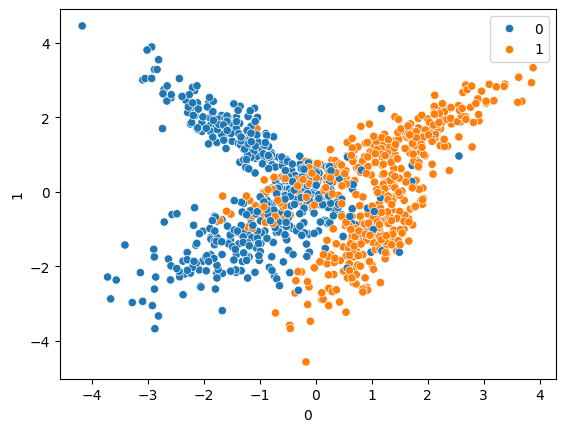

In [ ]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue = y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state = 10)

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(xtrain,ytrain)

SVC()

In [ ]:
## Prediction
ypred = svc.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.852
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       131
           1       0.87      0.81      0.84       119

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[117  14]
 [ 23  96]]


In [ ]:
rbf =SVC(kernel='rbf')
rbf.fit(xtrain, ytrain)

SVC()

In [ ]:
## Prediction
pred = rbf.predict(xtest)

In [ ]:
print(accuracy_score(ytest,pred))
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))

0.852
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       131
           1       0.87      0.81      0.84       119

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

[[117  14]
 [ 23  96]]


In [ ]:
polynomial =SVC(kernel='poly')
polynomial.fit(xtrain, ytrain)
## Prediction
pred1 = polynomial.predict(xtest)
print(accuracy_score(ytest,pred1))
print(classification_report(ytest,pred1))
print(confusion_matrix(ytest,pred1))

0.824
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       131
           1       0.89      0.72      0.80       119

    accuracy                           0.82       250
   macro avg       0.84      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250

[[120  11]
 [ 33  86]]


In [ ]:
sig =SVC(kernel='sigmoid')
sig.fit(xtrain, ytrain)
## Prediction
pred2 = sig.predict(xtest)
print(accuracy_score(ytest,pred2))
print(classification_report(ytest,pred2))
print(confusion_matrix(ytest,pred2))

0.76
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       131
           1       0.73      0.78      0.76       119

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

[[97 34]
 [26 93]]


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

## Defining parameter range
param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5, verbose = 3, refit = True)

In [ ]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
pred3 = grid.predict(xtest)
print(accuracy_score(ytest,pred3))
print(classification_report(ytest,pred3))
print(confusion_matrix(ytest,pred3))

0.856
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       131
           1       0.87      0.82      0.84       119

    accuracy                           0.86       250
   macro avg       0.86      0.85      0.86       250
weighted avg       0.86      0.86      0.86       250

[[117  14]
 [ 22  97]]


# SVM Kernels Indepth Intuition and Practical Explanation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 50)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [ ]:
x1 = np.linspace(-5.0, 5.0, 50)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

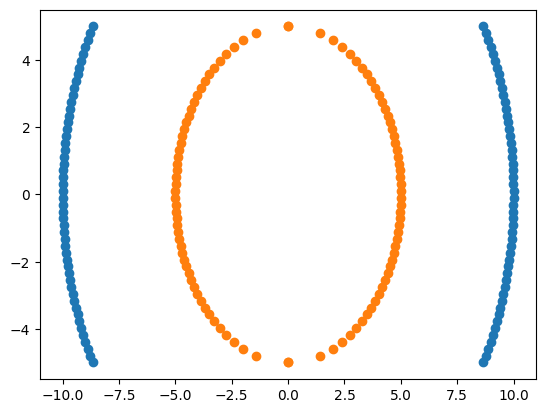

In [ ]:
plt.scatter(y,x)
plt.scatter(y1, x1)

In [ ]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2])
df.head()

,X1,X2,Y
0,8.660254,-5.000000,0
1,8.774917,-4.795918,0
2,8.883413,-4.591837,0
3,8.985967,-4.387755,0
4,9.082779,-4.183673,0


In [ ]:
## Independent and Dependent Features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head(5)

,X1,X2
0,8.660254,-5.000000
1,8.774917,-4.795918
2,8.883413,-4.591837
3,8.985967,-4.387755
4,9.082779,-4.183673


### Polynomial Kernel:
K(x,y) = (x^T +c)^d

In [ ]:
## We need to find components for the polynomial kernel
## X1, X2, X1_square, X2_square, X1*X2
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.000000,0,75.000000,25.000000,-43.301270
1,8.774917,-4.795918,0,76.999167,23.000833,-42.083785
2,8.883413,-4.591837,0,78.915035,21.084965,-40.791184
3,8.985967,-4.387755,0,80.747605,19.252395,-39.428223
4,9.082779,-4.183673,0,82.496876,17.503124,-37.999382


In [ ]:
## Independent and Dependent features
x = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['Y']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
xtrain.head()

,X1,X2,X1_square,X2_square,X1*X2
71,-9.974457,0.714286,99.489796,0.510204,-7.124612
24,4.998959,-0.102041,24.989588,0.010412,-0.510098
84,-4.608812,-1.938776,21.241150,3.758850,8.935452
97,-8.883413,-4.591837,78.915035,21.084965,40.791184
49,0.000000,5.000000,0.000000,25.000000,0.000000


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',color = 'Y')
fig

In [ ]:
fig1 = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2',color = 'Y')
fig1

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear')
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
accuracy_score(ytest, y_pred)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
rbf = SVC(kernel = 'rbf')
rbf.fit(xtrain, ytrain)
y_pred1 = rbf.predict(xtest)
accuracy_score(ytest, y_pred1)

1.0

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sig = SVC(kernel = 'sigmoid')
sig.fit(xtrain, ytrain)
y_pred2 = sig.predict(xtest)
accuracy_score(ytest, y_pred2)

1.0

#Support Vector Regression Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [ ]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [ ]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
## Independent and Dependent Features
x = df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']

## train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 10)

## Feature Encoding

### Label Encoding

In [ ]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()


In [ ]:
# Fit on xtrain and transform both xtrain and xtest
xtrain['sex'] = le1.fit_transform(xtrain['sex'])
xtest['sex'] = le1.transform(xtest['sex'])

xtrain['smoker'] = le2.fit_transform(xtrain['smoker'])
xtest['smoker'] = le2.transform(xtest['smoker'])

xtrain['time'] = le3.fit_transform(xtrain['time'])
xtest['time'] = le3.transform(xtest['time'])

In [ ]:
xtest.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


### One Hot Encoding

In [ ]:
## One Hot Encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ct = make_column_transformer((OneHotEncoder(),['day']), remainder = 'passthrough')

In [ ]:
import sys
np.set_printoptions(threshold = sys.maxsize)
xtrain = ct.fit_transform(xtrain)

In [ ]:
xtest = ct.transform(xtest)

In [ ]:
##SVR -- Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain, ytrain)

SVR()

In [ ]:
y_pred = svr.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print(r2_score(ytest, y_pred))
print(mean_absolute_error(ytest, y_pred))


0.4603150286622254
4.165330615782093


#### Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {'C':[0.01, 0.1, 1, 10, 100,1000],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}

In [ ]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 2/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-0.073 total time=   0.0s
[CV 3/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-0.172 total time=   0.0s
[CV 4/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 5/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-0.108 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.073 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.064 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.158 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid_pred = grid.predict(xtest)
print(r2_score(ytest, grid_pred))
print(mean_absolute_error(ytest, grid_pred))

0.5080052725955742
3.868510818748577
